In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [2]:
# Output file where the audio will be saved 
output_file = 'generated_audio.wav'

In [3]:
# Specify audio parameters
duration = 4  # in seconds
sampling_freq = 44100  # in Hz
tone_freq = 784 
min_val = -4 * np.pi
max_val = 4 * np.pi

In [4]:
# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

In [5]:
# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

In [6]:
# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

In [7]:
# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

In [8]:
# Extract the first 200 values from the audio signal 
signal = signal[:200]

In [9]:
# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

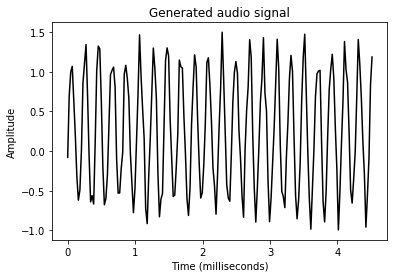

In [10]:
# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()